In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
import seaborn as sns

import pymorphy2

import warnings

warnings.filterwarnings("ignore")

RAND = 10

In [ ]:
df = pd.read_csv('../data/parse1997.csv')

# Общая информация

Данные собраны с сайта profi.ru (см. файл parsing_ver1)

Произведем разделение репетиторов на кластеры, чтобы облегчить пользователям подбор спрецалиста.

## Описание данных

В целом в данном датасэте названия соответствуют своему прямому смыслу:
- name - имя репетитора
- mark - оценка репетитора на сайте profi.ru
- status - статус репетитора на сайте profi.ru
- passport - проверен ли паспорт репетитора
- attestation - подтвержден ли уровень знаний
- discount - предоставляет ли репетитор скидки
- price - цена занятия
- duration - длительность занятия
- 1_stars, 2_stars, 3_stars, 4_stars, 5_stars - кол-во соответствующих оценок от пользователей
- Teaches_at_home, Teaches_at_clients_place, Teaches_remotely - место проведения занятия (на дому, у клиента, удаленно)
- Носитель английского                                         1997 non-null   int64 
- стажировка в США, стажировка в Англии - наличие стажировок в США/Англии
- сертификат CELTA - наличие сертификата CELTA (Cambridge English Language Assessment, CELTA Certificate тоже самое)
- сертификат TESOL - наличие сертификата TESOL (Teaching English for Speakers of Other Languagest, TESOL Certificate тоже самое)
- сертификат TEFL - наличие сертификата TEFL (Teaching English as a Foreign Language , TEFL Certificate тоже самое)
- сертификат TKT - наличие сертификата TKT (Teaching Knowledge Test, TKT Certificate тоже самое)
- сертификат TESOL - наличие сертификата TESOL (Teaching English for Speakers of Other Languagest, TESOL Certificate тоже самое) 
- бакалавр, магистр, аспирантура - уровень образвания
- учитель, переводчик, лингвист, лингвист-переводчик, преподаватель - образование (специальность) репетитора

Специализации, которые преподает репетитор:
- IELTS, IELTS Academic, IELTS General  
- Business English
- TOEFL
- Разговорный английский язык 
- ЕГЭ по английскому языку 
- Английский для путешествий 
- ОГЭ по английскому языку
- Английский для дошкольников
- Американский английский язык
- Британский английский язык
- Олимпиады по английскому языку
- Экономический английский                                    
- Английский для программистов                                 
- Технический английский  

In [3]:
df

,name,mark,status,passport,attestation,discount,price,duration,1_stars,2_stars,...,Английский для путешествий,ОГЭ по английскому языку,ОГЭ,Английский для дошкольников,Американский английский язык,Британский английский язык,Олимпиады по английскому языку,Экономический английский,Английский для программистов,Технический английский
0,Emil Mekhriev,"4,89",Очень хвалят,Паспорт проверен,Уровень знаний подтверждён,Нет,2940,50,1,1,...,1,1,1,1,1,1,1,1,1,0
1,Ирина Юрьевна Попенкова,"4,85",Очень хвалят,Паспорт проверен,Уровень знаний подтверждён,Нет,1600–2000,60–90,0,3,...,0,1,1,0,0,0,0,0,0,0
2,Александр Юрьевич Иванченко,"4,95",Очень хвалят,Паспорт проверен,Уровень знаний подтверждён,Нет,2200,60–90,1,0,...,0,1,1,0,0,0,0,0,0,0
3,Максим Станиславович Юдин,"4,95",Очень хвалят,Паспорт проверен,Нет,Есть,2990–4000,60,1,3,...,1,1,1,0,1,1,1,1,1,1
4,Светлана Андреевна Орлова,"4,99",Очень хвалят,Паспорт проверен,Уровень знаний подтверждён,Есть,4000,60,0,0,...,1,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,Наталья Григорьевна Трегубова,"4,93",Очень хвалят,Паспорт проверен,Нет,Есть,2000,по запросу,0,0,...,1,0,0,0,0,0,0,0,0,0
1993,Диана Александровна Гапсаламова,"4,75",Статуса нет,Паспорт проверен,Нет,Нет,1500–2000,60,0,0,...,0,0,1,0,0,0,0,0,0,0
1994,Татьяна Владимировна Олийник,"4,86",Статуса нет,Паспорт проверен,Нет,Нет,1000–1500,60,0,0,...,0,1,1,0,0,1,0,0,0,0
1995,Екатерина Александровна Субботина,"4,85",Статуса нет,Паспорт проверен,Нет,Нет,900–1400,60–90,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 57 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   name                                                         1997 non-null   object
 1   mark                                                         1997 non-null   object
 2   status                                                       1997 non-null   object
 3   passport                                                     1997 non-null   object
 4   attestation                                                  1997 non-null   object
 5   discount                                                     1997 non-null   object
 6   price                                                        1997 non-null   object
 7   duration                                                     1997 non-null   object
 8 

Пропусков нет, тк в случае, если репетитор не добавлял информации по какой-либо категории, в столбец вписывалось значение "Нет"

In [5]:
df.iloc[:, 1:].describe()

,1_stars,2_stars,3_stars,4_stars,5_stars,Teaches_at_home,Teaches_at_clients_place,Teaches_remotely,Носитель английского,стажировка в США,...,Английский для путешествий,ОГЭ по английскому языку,ОГЭ,Английский для дошкольников,Американский английский язык,Британский английский язык,Олимпиады по английскому языку,Экономический английский,Английский для программистов,Технический английский
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,...,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,0.104657,0.274912,0.588383,2.328993,38.331497,0.393590,0.421132,0.999499,0.010516,0.012519,...,0.383075,0.578368,0.676014,0.138708,0.128693,0.207311,0.174762,0.129194,0.043565,0.073110
std,0.390985,0.756426,1.252983,3.601439,36.563014,0.488668,0.493864,0.022377,0.102031,0.111213,...,0.486258,0.493944,0.468112,0.345728,0.334944,0.405482,0.379859,0.335498,0.204177,0.260382
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,3.000000,48.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,11.000000,16.000000,36.000000,551.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.describe(include=["object", "bool"])

,name,mark,status,passport,attestation,discount,price,duration
count,1997,1997,1997,1997,1997,1997,1997,1997
unique,1997,58,3,6,2,2,301,27
top,Emil Mekhriev,"5,0",Очень хвалят,Паспорт проверен,Нет,Нет,2000,60
freq,1,530,1172,1798,1696,1304,205,1171


У признака status 3 уникальных значения, вместо двух, значит, есть лишнее значение:

In [7]:
df['status'][(df['status'] != 'Очень хвалят')
             & (df['status'] != 'Статуса нет')]

183    4,89303 отзыва
Name: status, dtype: object

In [8]:
df['status'].iloc[183]

'4,89303\xa0отзыва'

In [9]:
df.loc[df['status'] == '4,89303\xa0отзыва', 'status'] = 'Статуса нет'
df['status'].value_counts()

Очень хвалят    1172
Статуса нет      825
Name: status, dtype: int64

In [10]:
# Переименуем некоторые признаки
df.rename(
    {
        'TOEFL': 'подготовка_к_TOEFL',
        'IELTS': 'подготовка_к_IELTS',
        'IELTS Academic': 'подготовка_к_IELTS_Academic',
        'IELTS General': 'подготовка_к_IELTS_General',
        'Teaches_at_home': 'Принимает_у_себя',
        'Teaches_at_clients_place': 'Выезд_к_клиенту',
        'Teaches_remotely': 'Работает_удаленно'
    },
    axis=1,
    inplace=True)

# Feature engineering

## Удаление дублирующихся признаков

Репетиторы записывают одни и те же услуги в разных формулировках, поэтому некоторые услуги дублируются, объединим их:

In [11]:
def create_and_remove_columns(data: pd.DataFrame, columns_to_check: List[str],
                              new_column_name: str,
                              condition_value: int) -> None:
    """
    Создание нового столбца на основе существующих
    :param data: датасэт
    :param columns_to_check: список названий услуги
    :param new_column_name: название для нового столбца
    :param condition_value: значение для проверки на наличие названия
    """
    data[new_column_name] = (data[columns_to_check] == condition_value).any(
        axis=1).astype(int)

    data.drop(columns=columns_to_check, axis=1, inplace=True)

In [12]:
create_and_remove_columns(df, [
    'CELTA Certificate', 'сертификат CELTA',
    'сертификат Cambridge English Language Assessment'
], 'имеет_серт_CELTA', 1)

In [13]:
create_and_remove_columns(df, [
    'сертификат TESOL',
    'сертификат Teaching English for Speakers of Other Languages',
    'TESOL Certificate'
], 'имеет_серт_TESOL', 1)

In [14]:
create_and_remove_columns(df, [
    'сертификат TEFL', 'сертификат Teaching English as a Foreign Language',
    'TEFL Certificate'
], 'имеет_серт_TEFL', 1)

In [15]:
create_and_remove_columns(df, [
    'сертификат TKT', 'сертификат Teaching Knowledge Test',
    'TKT Certificate'
], 'имеет_серт_TKT', 1)

In [16]:
create_and_remove_columns(df, [ 
    'ЕГЭ по английскому языку', 'ЕГЭ'
], 'подготовка_к_ЕГЭ', 1)

In [17]:
create_and_remove_columns(df, [
    'ОГЭ по английскому языку', 'ОГЭ'
], 'подготовка_к_ОГЭ', 1)

In [18]:
df.iloc[:,23:26].value_counts()

переводчик  лингвист  лингвист-переводчик
0           0         0                      1022
            1         0                       405
1           0         0                       319
            1         0                       191
                      1                        60
dtype: int64

Лингвистов-переводчиков самих по себе нет (то есть нет случаев, где переводчик=0, лингвист=0, а лингвист-переводчик=1). Здесь это те люди, которые имеют образование И лингвиста И переводчика (исходя из данных выше), значит можно этот столбец удалить:

In [19]:
df[(df['переводчик'] == 0) & (df['лингвист'] == 0) &
   (df['лингвист-переводчик'] == 1)]

,name,mark,status,passport,attestation,discount,price,duration,1_stars,2_stars,...,Олимпиады по английскому языку,Экономический английский,Английский для программистов,Технический английский,имеет_серт_CELTA,имеет_серт_TESOL,имеет_серт_TEFL,имеет_серт_TKT,подготовка_к_ЕГЭ,подготовка_к_ОГЭ


In [20]:
df = df.drop(columns=['лингвист-переводчик'])

Объединим признаки 'учитель' и 'преподаватель' в один:

In [21]:
def feature_merging(row: pd.Series) -> int:
    """
    Объединение столбцов в новый по условию
    """
    return 1 if any(row[['учитель', 'преподаватель']] == 1) else 0


df['педагог_образование'] = df.apply(feature_merging, axis=1)

In [22]:
df['педагог_образование'].value_counts()

1    1258
0     739
Name: педагог_образование, dtype: int64

In [23]:
df = df.drop(columns=['учитель', 'преподаватель'])

## Добавление новых признаков

Тк есть признаки бакалавр, магистр, аспирантура, которые по отдельности несут мало информации, можно создать новые признаки на их основе: 

In [24]:
df.groupby('бакалавр')[['магистр', 'аспирантура']].value_counts()

бакалавр  магистр  аспирантура
0         0        0              1539
          1        0               113
          0        1                50
          1        1                 9
1         0        0               161
          1        0               112
                   1                11
          0        1                 2
dtype: int64

In [25]:
# есть высшее образование, но не языковое
len(df[(df.iloc[:, [19, 20, 21]].eq(1).any(axis=1))
       & (df.iloc[:, [22, 23, 44]].eq(0).all(axis=1))])

125

In [26]:
# есть языковое образование
len(df[(df.iloc[:, [22, 23, 44]].eq(1).any(axis=1))])

1612

In [27]:
# образование не указано
len(df[(df.iloc[:, [19, 20, 21, 22, 23, 44]].eq(0).all(axis=1))])

260

In [28]:
def new_feature_graduate(row: pd.Series) -> str:
    """
    Создание признака 'Тип образования'
    :param row: строки датасэта
    :return: значение нового признака
    """
    job = ''
    if any(row.iloc[[19, 20, 21]] == 1) and all(row.iloc[i] == 0
                                                for i in [22, 23, 44]):
        job = 'Иное высшее образование'
    elif all(row.iloc[[19, 20, 21, 22, 23, 44]] == 0):
        job = 'Образование не указано'
    else:
        job = 'Высшее языковое образование'
    return job

In [29]:
df['тип_образования'] = df.apply(new_feature_graduate, axis=1)
df['тип_образования'].value_counts()

Высшее языковое образование    1612
Образование не указано          260
Иное высшее образование         125
Name: тип_образования, dtype: int64

In [30]:
#Через join
# def new_feature_graduate(row: pd.Series) -> str:
#     """
#     Создание признака 'Образование'
#     """
#     job_list = []
#     if any(row.iloc[[19, 20, 21]] == 1) and all(row.iloc[i] == 0
#                                                 for i in [22, 23, 44]):
#         job_list.append('Иное высшее образование')
#     elif all(row.iloc[[19, 20, 21, 22, 23, 44]] == 0):
#         job_list.append('Образование не указано')
#     else:
#         job_list.append('Высшее языковое образование')
#     return ', '.join(job_list)

# df['тип_образования'] = df.apply(new_feature_graduate, axis=1)
# df['тип_образования'].value_counts()

In [31]:
df = df.drop(columns=['бакалавр', 'магистр', 'аспирантура'])

Тк сами по себе признаки "1_stars:5_stars" ни о чем не говорят, добавим признаки - % 1-5 звёздочных отзывов.

In [32]:
df['все_отзывы'] = df['1_stars'] + df['2_stars'] + \
    df['3_stars'] + df['4_stars'] + df['5_stars']

In [33]:
df['1_звезда_процент'] = round(df['1_stars'] / df['все_отзывы'], 4) * 100

df['2_звезды_процент'] = (round(df['2_stars'] / df['все_отзывы'], 2) *
                          100).astype(int)

df['3_звезды_процент'] = (round(df['3_stars'] / df['все_отзывы'], 2) *
                          100).astype(int)

df['4_звезды_процент'] = (round(df['4_stars'] / df['все_отзывы'], 2) *
                          100).astype(int)

df['5_звезд_процент'] = (round(df['5_stars'] / df['все_отзывы'], 2) *
                         100).astype(int)

In [34]:
df = df.drop(
    columns=['1_stars', '2_stars', '3_stars', '4_stars', '5_stars'])

Определяем пол с помощью pymorphy2 (по имени)

In [35]:
def splitter(names: pd.Series) -> list:
    """
    Выделение имени из ФИО
    """
    list_first_names = []
    for i in names:
        first_name = i.split(' ')[0]
        list_first_names.append(first_name)
    return list_first_names

In [36]:
first_names = splitter(df['name'])

In [37]:
morph = pymorphy2.MorphAnalyzer()

for name in first_names:
    parsed_word = morph.parse(name)[0]
    print('{:<15} {}'.format(name, parsed_word.tag.gender))

Emil            None
Ирина           femn
Александр       masc
Максим          masc
Светлана        femn
Марина          femn
Юлия            femn
Эмма            femn
Вадим           masc
Мария           femn
Елена           femn
Алексей         masc
Юлия            femn
Аида            femn
Елена           femn
Екатерина       femn
Наталья         femn
Виктор          masc
Ольга           femn
Jeffery         None
Наталья         femn
Hackett         None
Ольга           femn
Ирина           femn
Сергей          masc
Екатерина       femn
Юрий            masc
Алексей         masc
Андрей          masc
Евгения         masc
Виктория        femn
Андрей          masc
Татьяна         femn
Татьяна         femn
Елена           femn
Ирина           femn
Дмитрий         masc
Юлия            femn
Никита          masc
Ирина           femn
Алёна           femn
Ольга           femn
Мария           femn
Дмитрий         masc
Владимир        masc
Василиса        femn
Марина          femn
Лилия        

In [38]:
genders = []
for name in first_names:
    parsed_word = morph.parse(name)[0]
    genders.append(str(parsed_word.tag.gender))

In [39]:
df.insert(loc=1, column='пол', value=genders)

In [40]:
df['пол'].value_counts()

femn    1464
masc     489
None      42
neut       2
Name: пол, dtype: int64

Некоторые репетиторы по английскому - иностранцы, pymorphy не может определить их пол по имени. Исправим некоторые значения вручную(тк значений neut небольшое кол-во), остальным присвоим значение masc, тк большинство из них, мужчины.

In [41]:
df[df['пол']=='None']

,name,пол,mark,status,passport,attestation,discount,price,duration,Принимает_у_себя,...,подготовка_к_ЕГЭ,подготовка_к_ОГЭ,педагог_образование,тип_образования,все_отзывы,1_звезда_процент,2_звезды_процент,3_звезды_процент,4_звезды_процент,5_звезд_процент
0,Emil Mekhriev,None,"4,89",Очень хвалят,Паспорт проверен,Уровень знаний подтверждён,Нет,2940,50,1,...,1,1,0,Образование не указано,303,0.33,0,1,7,92
19,Jeffery Allan Goza,None,"4,87",Очень хвалят,Паспорт проверен,Нет,Нет,4000,45,1,...,0,0,0,Иное высшее образование,39,0.00,3,3,0,95
21,Hackett Samuel Luke,None,"4,94",Очень хвалят,Паспорт проверен,Нет,Нет,2500,60,0,...,0,0,0,Образование не указано,83,0.00,1,0,2,96
130,Gonzales Danielo Simone,None,"4,89",Очень хвалят,Паспорт не проверен,Нет,Нет,2330,90,0,...,1,0,0,Образование не указано,56,0.00,0,2,7,91
139,Ван Эетвельде Светлана Юрьевна,None,"4,87",Очень хвалят,Паспорт проверен,Нет,Есть,от 1000,60,1,...,0,0,1,Высшее языковое образование,31,0.00,0,0,13,87
166,Nicholas Adam Hamper,None,"4,91",Очень хвалят,Паспорт проверен,Нет,Есть,4000,60,1,...,0,0,0,Образование не указано,35,0.00,0,0,9,91
243,Godwin Ibe,None,"4,77",Статуса нет,Паспорт проверен,Нет,Есть,1000–2000,60–90,1,...,1,1,0,Иное высшее образование,209,0.00,2,3,11,84
258,Нейля Ибрагимовна Круглова,None,"4,97",Очень хвалят,Паспорт проверен,Нет,Нет,по договорённости,60,1,...,1,1,1,Высшее языковое образование,31,0.00,0,0,3,97
273,Tyger Elina,None,"4,92",Очень хвалят,Паспорт проверен,Нет,Есть,4000,45–60,0,...,0,0,1,Высшее языковое образование,37,0.00,3,0,0,97
315,Carl Halford,None,"4,58",Статуса нет,Паспорт не проверен,Нет,Нет,2000,90,1,...,1,1,0,Образование не указано,110,0.91,5,6,12,76


In [42]:
df[df['пол']=='neut']

,name,пол,mark,status,passport,attestation,discount,price,duration,Принимает_у_себя,...,подготовка_к_ЕГЭ,подготовка_к_ОГЭ,педагог_образование,тип_образования,все_отзывы,1_звезда_процент,2_звезды_процент,3_звезды_процент,4_звезды_процент,5_звезд_процент
397,Текле Арутюновна Тепоян,neut,"4,90",Очень хвалят,Паспорт проверен,Нет,Нет,2000–2800,60,0,...,1,1,1,Высшее языковое образование,39,0.0,3,0,3,95
1199,Рашия Ганипаевна Абдуллаева,neut,"4,95",Статуса нет,Паспорт проверен,Нет,Нет,1500,по запросу,0,...,1,1,0,Образование не указано,56,0.0,0,0,5,95


In [43]:
df.loc[df['пол'] == 'neut', 'пол'] = 'femn'

In [44]:
df['пол'].iloc[[139, 258, 273, 613, 870, 1718, 1735, 1978]] = 'femn'

In [45]:
df.loc[df['пол'] == 'None', 'пол'] = 'masc'

In [46]:
df['пол'].value_counts()

femn    1474
masc     523
Name: пол, dtype: int64

Тк у некоторых репетиторов нет фиксированной стоимости занятия, рассчитаем среднее значение:

In [47]:
#Checkpoint
df2=df.copy()

In [48]:
def clean_and_average(price: str) -> float:
    """
    Извлечение числа из строки и возвращение среднего значения
    """
    prices = [int(p) for p in re.findall(r'\d+', price)]
    if prices:
        return np.mean(prices)
    return np.nan

df['mean_price'] = df['price'].apply(clean_and_average)

In [49]:
df['mean_price'].isna().sum()

29

Появилось некоторое кол-во пропусков, тк некоторые репетиторы вместо цены указывали 'по запросу'/'по договоренности'

In [50]:
df.fillna(np.mean(df['mean_price']), inplace=True)

In [51]:
df['mean_price'].isna().sum()

0

## Преобразования признаков, бинаризация

In [52]:
df['duration'].value_counts()

60            1171
по запросу     309
90             151
60–90          150
45–60           66
45              61
45–90           16
50–60           12
40–60           10
30–60            9
50               7
30               7
Нет              5
30–90            4
60–80            3
75               2
45–80            2
60–75            2
40               2
180–240          1
30–45            1
45–50            1
90–240           1
60–120           1
40–90            1
50–90            1
80               1
Name: duration, dtype: int64

In [53]:
# Там где нет длительности занятия укажем 0
df.loc[(df['duration'] == 'по запросу') | (df['duration'] == 'Нет'),
       'duration'] = '0'

In [54]:
df['mean_duration'] = df['duration'].apply(clean_and_average)

In [55]:
def get_bins_duration(data: float) -> str:
    """
    Генерация бинов для признака "duration"
    """
    if data <= 45:
        return 'длит_занятия_0-45_мин'
    elif 30 < data < 90:
        return 'длит_занятия_30-90_мин'
    else:
        return 'длит_занятия_90-240_мин'


df['duration_bins'] = df.mean_duration.transform(
    lambda x: get_bins_duration(x))

In [56]:
df['duration_bins'].value_counts()

длит_занятия_30-90_мин     1449
длит_занятия_0-45_мин       394
длит_занятия_90-240_мин     154
Name: duration_bins, dtype: int64

In [57]:
df = df.drop(columns=['price', 'duration'])

In [58]:
df['passport'].value_counts()

Паспорт проверен                1798
Паспорт не проверен              176
Мало отзывов по вашей услуге      17
Данные компании проверены          3
Нет отзывов по вашей услуге        2
Данные компании не проверены       1
Name: passport, dtype: int64

In [59]:
def get_bins_passport(data: str) -> str:
    """
    Генерация бинов для признака "passport"
    """
    if str(data) == 'Данные компании проверены':
        return 'Паспорт проверен'
    elif str(data) == 'Данные компании не проверены' or str(
            data) == 'Мало отзывов по вашей услуге' or str(
                data) == 'Нет отзывов по вашей услуге':
        return 'Паспорт не проверен'
    else:
        return data

In [60]:
df['passport_bins'] = df.passport.transform(lambda x: get_bins_passport(x))

In [61]:
df['passport_bins'].value_counts()

Паспорт проверен       1801
Паспорт не проверен     196
Name: passport_bins, dtype: int64

In [62]:
df = df.drop(columns=['passport'])

In [63]:
df3=df.copy()

Проанализируем статистику по оценкам, отзывам и ценам:

In [64]:
# Преобразуем признак mark, чтобы использовать describe()
df['mark'] = df['mark'].str.replace(',', '.')
df['mark'] = df['mark'].astype(float)

In [65]:
df.loc[:, [
    'mark', 'все_отзывы', 'mean_price', '1_звезда_процент', '2_звезды_процент',
    '3_звезды_процент', '4_звезды_процент', '5_звезд_процент'
]].describe()

,mark,все_отзывы,mean_price,1_звезда_процент,2_звезды_процент,3_звезды_процент,4_звезды_процент,5_звезд_процент
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,4.902709,41.628443,1819.494580,0.202889,0.486730,1.178768,5.103655,93.020030
std,0.101496,40.112994,846.629363,0.888350,1.377405,2.223844,5.526015,6.838723
min,4.250000,1.000000,67.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,4.850000,19.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,89.000000
50%,4.930000,30.000000,1670.000000,0.000000,0.000000,0.000000,4.000000,94.000000
75%,5.000000,51.000000,2150.000000,0.000000,0.000000,2.000000,8.000000,100.000000
max,5.000000,567.000000,6670.000000,14.290000,25.000000,28.000000,43.000000,100.000000


Исходя из значений mean, min, max и др. статистик можно сформировать бины и удалить первоначальные признаки:

In [66]:
def get_bins_mark(data: float) -> str:
    """
    Генерация бинов для признака "mark"
    """
    if data < 4.7:
        return 'оценка_<_4.7'
    elif 4.7 <= data < 4.9:
        return 'оценка_4.7-4.9'
    else:
        return 'оценка_>_4.9'

df['mark_bins'] = df.mark.transform(lambda x: get_bins_mark(x))

In [67]:
df['mark_bins'].value_counts()

оценка_>_4.9      1228
оценка_4.7-4.9     695
оценка_<_4.7        74
Name: mark_bins, dtype: int64

In [68]:
def get_bins_reviews(data: int) -> str:
    """
    Генерация бинов для признака "все_отзывы"
    """
    if data < 50:
        return 'менее_50_отзывов'
    elif 50 <= data <= 250:
        return '50-250_отзывов'
    else:
        return 'более_250_отзывов'

df['reviews_bins'] = df.все_отзывы.transform(lambda x: get_bins_reviews(x))

In [69]:
df['reviews_bins'].value_counts()

менее_50_отзывов     1463
50-250_отзывов        524
более_250_отзывов      10
Name: reviews_bins, dtype: int64

In [70]:
df4=df.copy()

In [71]:
df['1-3_звезды'] = df['1_звезда_процент'] + \
    df['2_звезды_процент'] + df['3_звезды_процент']

In [72]:
def get_bins_stars(data: pd.Series) -> str:
    """
    Генерация бинов для признака "1-5_звезд_%"
    """
    if data['5_звезд_процент'] >= 95:
        return 'отзывов на 5 звезд больше 95%'
    elif data['1-3_звезды'] >= 10:
        return 'доля плохих отзывов 10% и более'
    else:
        return 0

df['отзывы'] = df.apply(get_bins_stars, axis=1)

In [73]:
df['отзывы'].value_counts()

отзывов на 5 звезд больше 95%      983
0                                  965
доля плохих отзывов 10% и более     49
Name: отзывы, dtype: int64

In [74]:
def get_bins_price(data: float) -> str:
    """
    Генерация бинов для признака "mean_price"
    """
    if data < 1500:
        return 'cредняя_цена_<1500'
    elif 1500 <= data <= 3500:
        return 'cредняя_цена_1500-3500'
    else:
        return 'cредняя_цена_>3500'
    
df['средняя_цена'] = df.mean_price.transform(lambda x: get_bins_price(x))

In [75]:
df['средняя_цена'].value_counts()

cредняя_цена_1500-3500    1219
cредняя_цена_<1500         697
cредняя_цена_>3500          81
Name: средняя_цена, dtype: int64

# Exploratory data analysis

Так как здесь нет целевой переменной, гипотезы формировались с целью расширить представление о взаимосвязях между признаками.

Гипотезы:
- цена занятия зависит от пола репетитора
- специалисты женщины чаще имеют педагогическое образование 
- у репетиторов с педагогическим образованием оценка выше
- самые дорогие репетиторы - носители языка

## Цена занятия зависит от пола репетитора

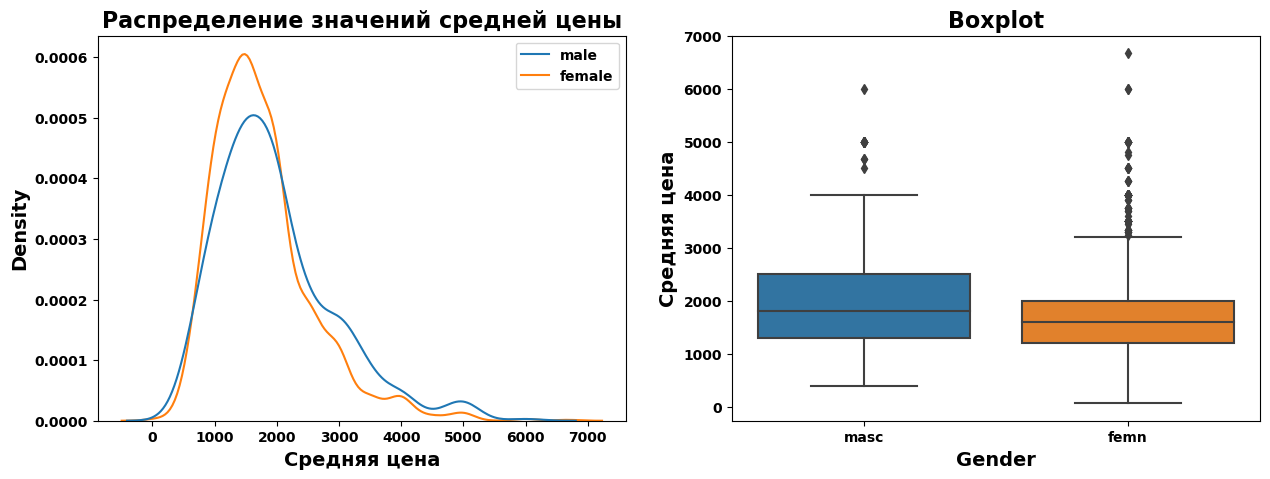

In [76]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.kdeplot(data={
    "male": df[df.пол == 'masc'].mean_price,
    "female": df[df.пол == 'femn'].mean_price
},
    common_norm=False,
    ax=axes[0])

axes[0].set_title('Распределение значений средней цены', fontsize=16)
axes[0].set_xlabel('Средняя цена', fontsize=14)
axes[0].set_ylabel('Density', fontsize=14)

sns.boxplot(x='пол', y='mean_price', data=df, ax=axes[1])

axes[1].set_title('Boxplot', fontsize=16)
axes[1].set_ylabel('Средняя цена', fontsize=14)
axes[1].set_xlabel('Gender', fontsize=14)
plt.show()

- По графикам видно, что цены на услуги у женщин ниже, но разница не очень большая (см. ниже)

Посмотрим на среднее значение:

In [77]:
print(
    f"Средняя стоимость по признаку {df.groupby('пол')['mean_price'].mean()}")

Средняя стоимость по признаку пол
femn    1767.430151
masc    1966.230658
Name: mean_price, dtype: float64


## Специалисты женщины чаще имеют педагогическое образование

In [78]:
def barplot_group(col_main: str, col_group: str, title: str) -> None:
    """
    Построение barplot с нормированными данными с выводом значений на графике
    """

    plt.figure(figsize=(15, 6))

    data = (df.groupby(
        [col_group])[col_main].value_counts(normalize=True).rename(
            'percentage').mul(100).reset_index().sort_values(col_group))

    ax = sns.barplot(x=col_main,
                     y="percentage",
                     hue=col_group,
                     data=data,
                     palette='rocket')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,  # текст
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 7),
            textcoords='offset points',
            fontsize=12)

    plt.title(title, fontsize=16)
    plt.ylabel('Percentage', fontsize=14)
    plt.xlabel(col_main, fontsize=14)
    plt.show()

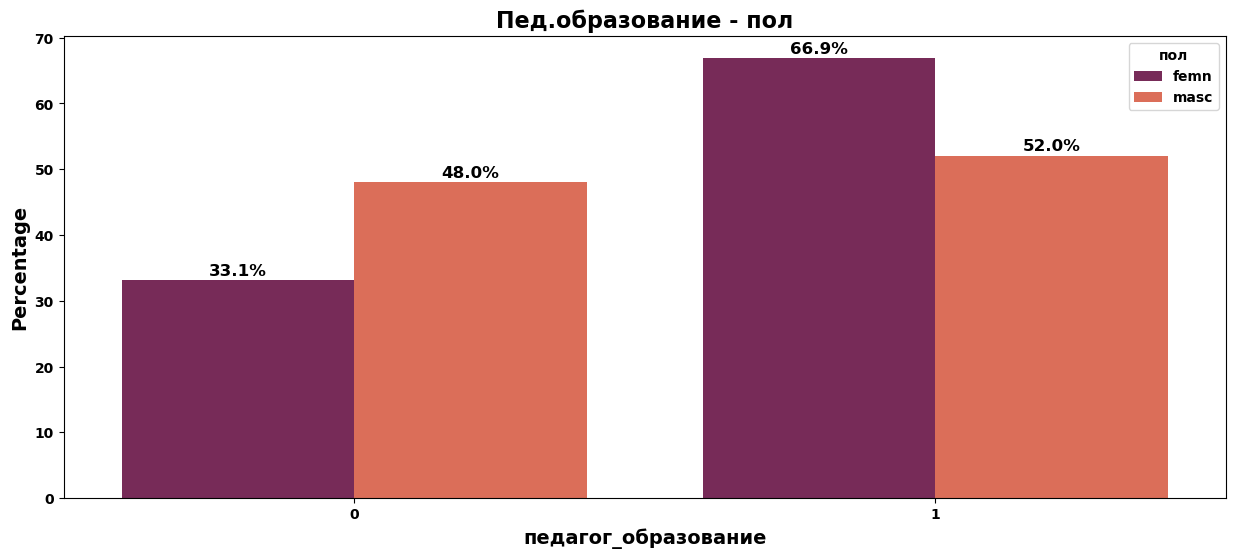

In [79]:
barplot_group("педагог_образование", "пол", 'Пед.образование - пол')

- Исходя из графика доля женщин репетиторов имеющих педагогическое образование выше. Это может быть связано с тем, что женщины чаще поступают на гуманитарные специальности, а мужчины приходят к репетиторству иностранных языков из других профессий.

## У репетиторов с педагогическим образованием оценка выше

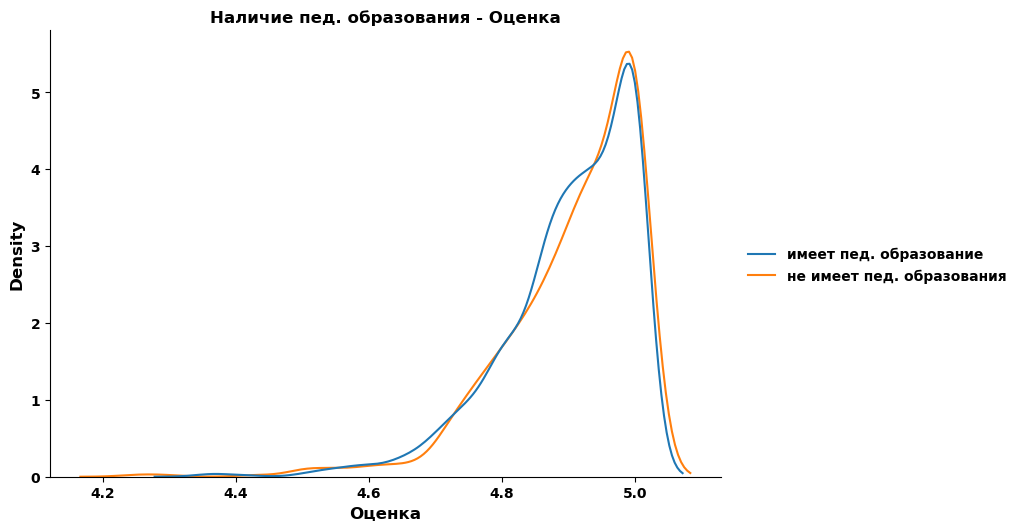

In [80]:
sns.displot(
    {
        "имеет пед. образование": df[df.педагог_образование == 1].mark,
        "не имеет пед. образования": df[df.педагог_образование == 0].mark,
    },
    kind="kde",
    common_norm=False,
    height=5,
    aspect=1.5)

plt.title('Наличие пед. образования - Оценка', fontsize=12)
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.show()

- Оценки репетиторов с педагогическим образованием и без практически не отличаются.

## Самые дорогие репетиторы - носители языка

<AxesSubplot: xlabel='Носитель английского', ylabel='mean_price'>

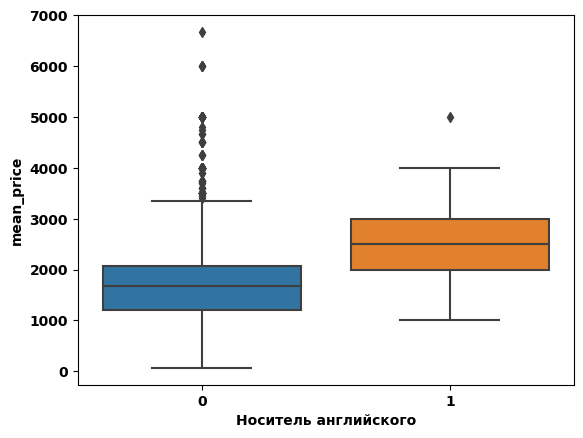

In [81]:
sns.boxplot(x='Носитель английского', y='mean_price', data=df)

In [82]:
df['Носитель английского'].value_counts()

0    1976
1      21
Name: Носитель английского, dtype: int64

- Носителей языка очень мало(!), но если не учитывать количество, то цена носителей языка значительно выше

# Конечное редактирование

## Бинаризация 

Удалим все признаки, которые точно не нужны:

In [83]:
df = df.drop(columns=df.iloc[:, 36:44], axis=1)

In [84]:
# Бинаризуем отдельно признаки с drop_first=True
df_bins_no_drop = df[[
    'пол', 'status', 'тип_образования', 'duration_bins', 'mark_bins',
    'reviews_bins', 'средняя_цена'
]]
df_dummies = pd.get_dummies(df_bins_no_drop)

df_bins_with_drop = df[['attestation', 'discount', 'passport_bins', 'отзывы']]
df_dummies2 = pd.get_dummies(df_bins_with_drop, drop_first=True)

In [85]:
df_labels1 = pd.concat([df, df_dummies], axis=1)
df_labels = pd.concat([df_labels1, df_dummies2], axis=1)

In [86]:
df_labels = df_labels.drop(columns=df.loc[:, 'пол':'discount'], axis=1).drop(
    columns=df.loc[:, 'тип_образования':'средняя_цена'], axis=1)
df_labels = df_labels.drop(columns=['status_Статуса нет'], axis=1)

## Переименование признаков

После бинаризации названия получились громоздкими, переименуем:

In [87]:
df_labels.rename(
    {
        'тип_образования_Высшее языковое образование': 'Высшее_языковое_образование',
        'тип_образования_Иное высшее образование': 'Иное_высшее_образование',
        'тип_образования_Образование не указано': 'Образование_не_указано',
        'duration_bins_длит_занятия_0-45_мин': 'длит_занятия_до_45_мин',
        'duration_bins_длит_занятия_30-90_мин': 'длит_занятия_30-90_мин' ,
        'duration_bins_длит_занятия_90-240_мин': 'длит_занятия_90-240_мин' ,
        'mark_bins_оценка_4.7-4.9': 'оценка_репетитора_4.7-4.9' ,
        'mark_bins_оценка_<_4.7': 'оценка_репетитора_<_4.7',
        'mark_bins_оценка_>_4.9': 'оценка_репетитора_>_4.9' ,
        'reviews_bins_50-250_отзывов': '50-250_отзывов' ,
        'reviews_bins_более_250_отзывов': 'более_250_отзывов' ,
        'reviews_bins_менее_50_отзывов': 'менее_50_отзывов' ,
        'средняя_цена_cредняя_цена_1500-3500': 'ср_цена_1500-3500' ,
        'средняя_цена_cредняя_цена_<1500': 'ср_цена_<1500' ,
        'средняя_цена_cредняя_цена_>3500': 'ср_цена_>3500' ,
        'attestation_Уровень знаний подтверждён': 'уровень_знаний_подтверждён' ,
        'discount_Нет': 'нет_скидок' ,
        'passport_bins_Паспорт проверен': 'паспорт_проверен' ,
        'отзывы_доля плохих отзывов 10% и более': 'доля_плохих_отзывов_10%_и_более' ,
        'отзывы_отзывов на 5 звезд больше 95%': 'отзывов_5_звезд_больше_95%' ,
    },
    axis=1,
    inplace=True)

## Корреляция

<AxesSubplot: >

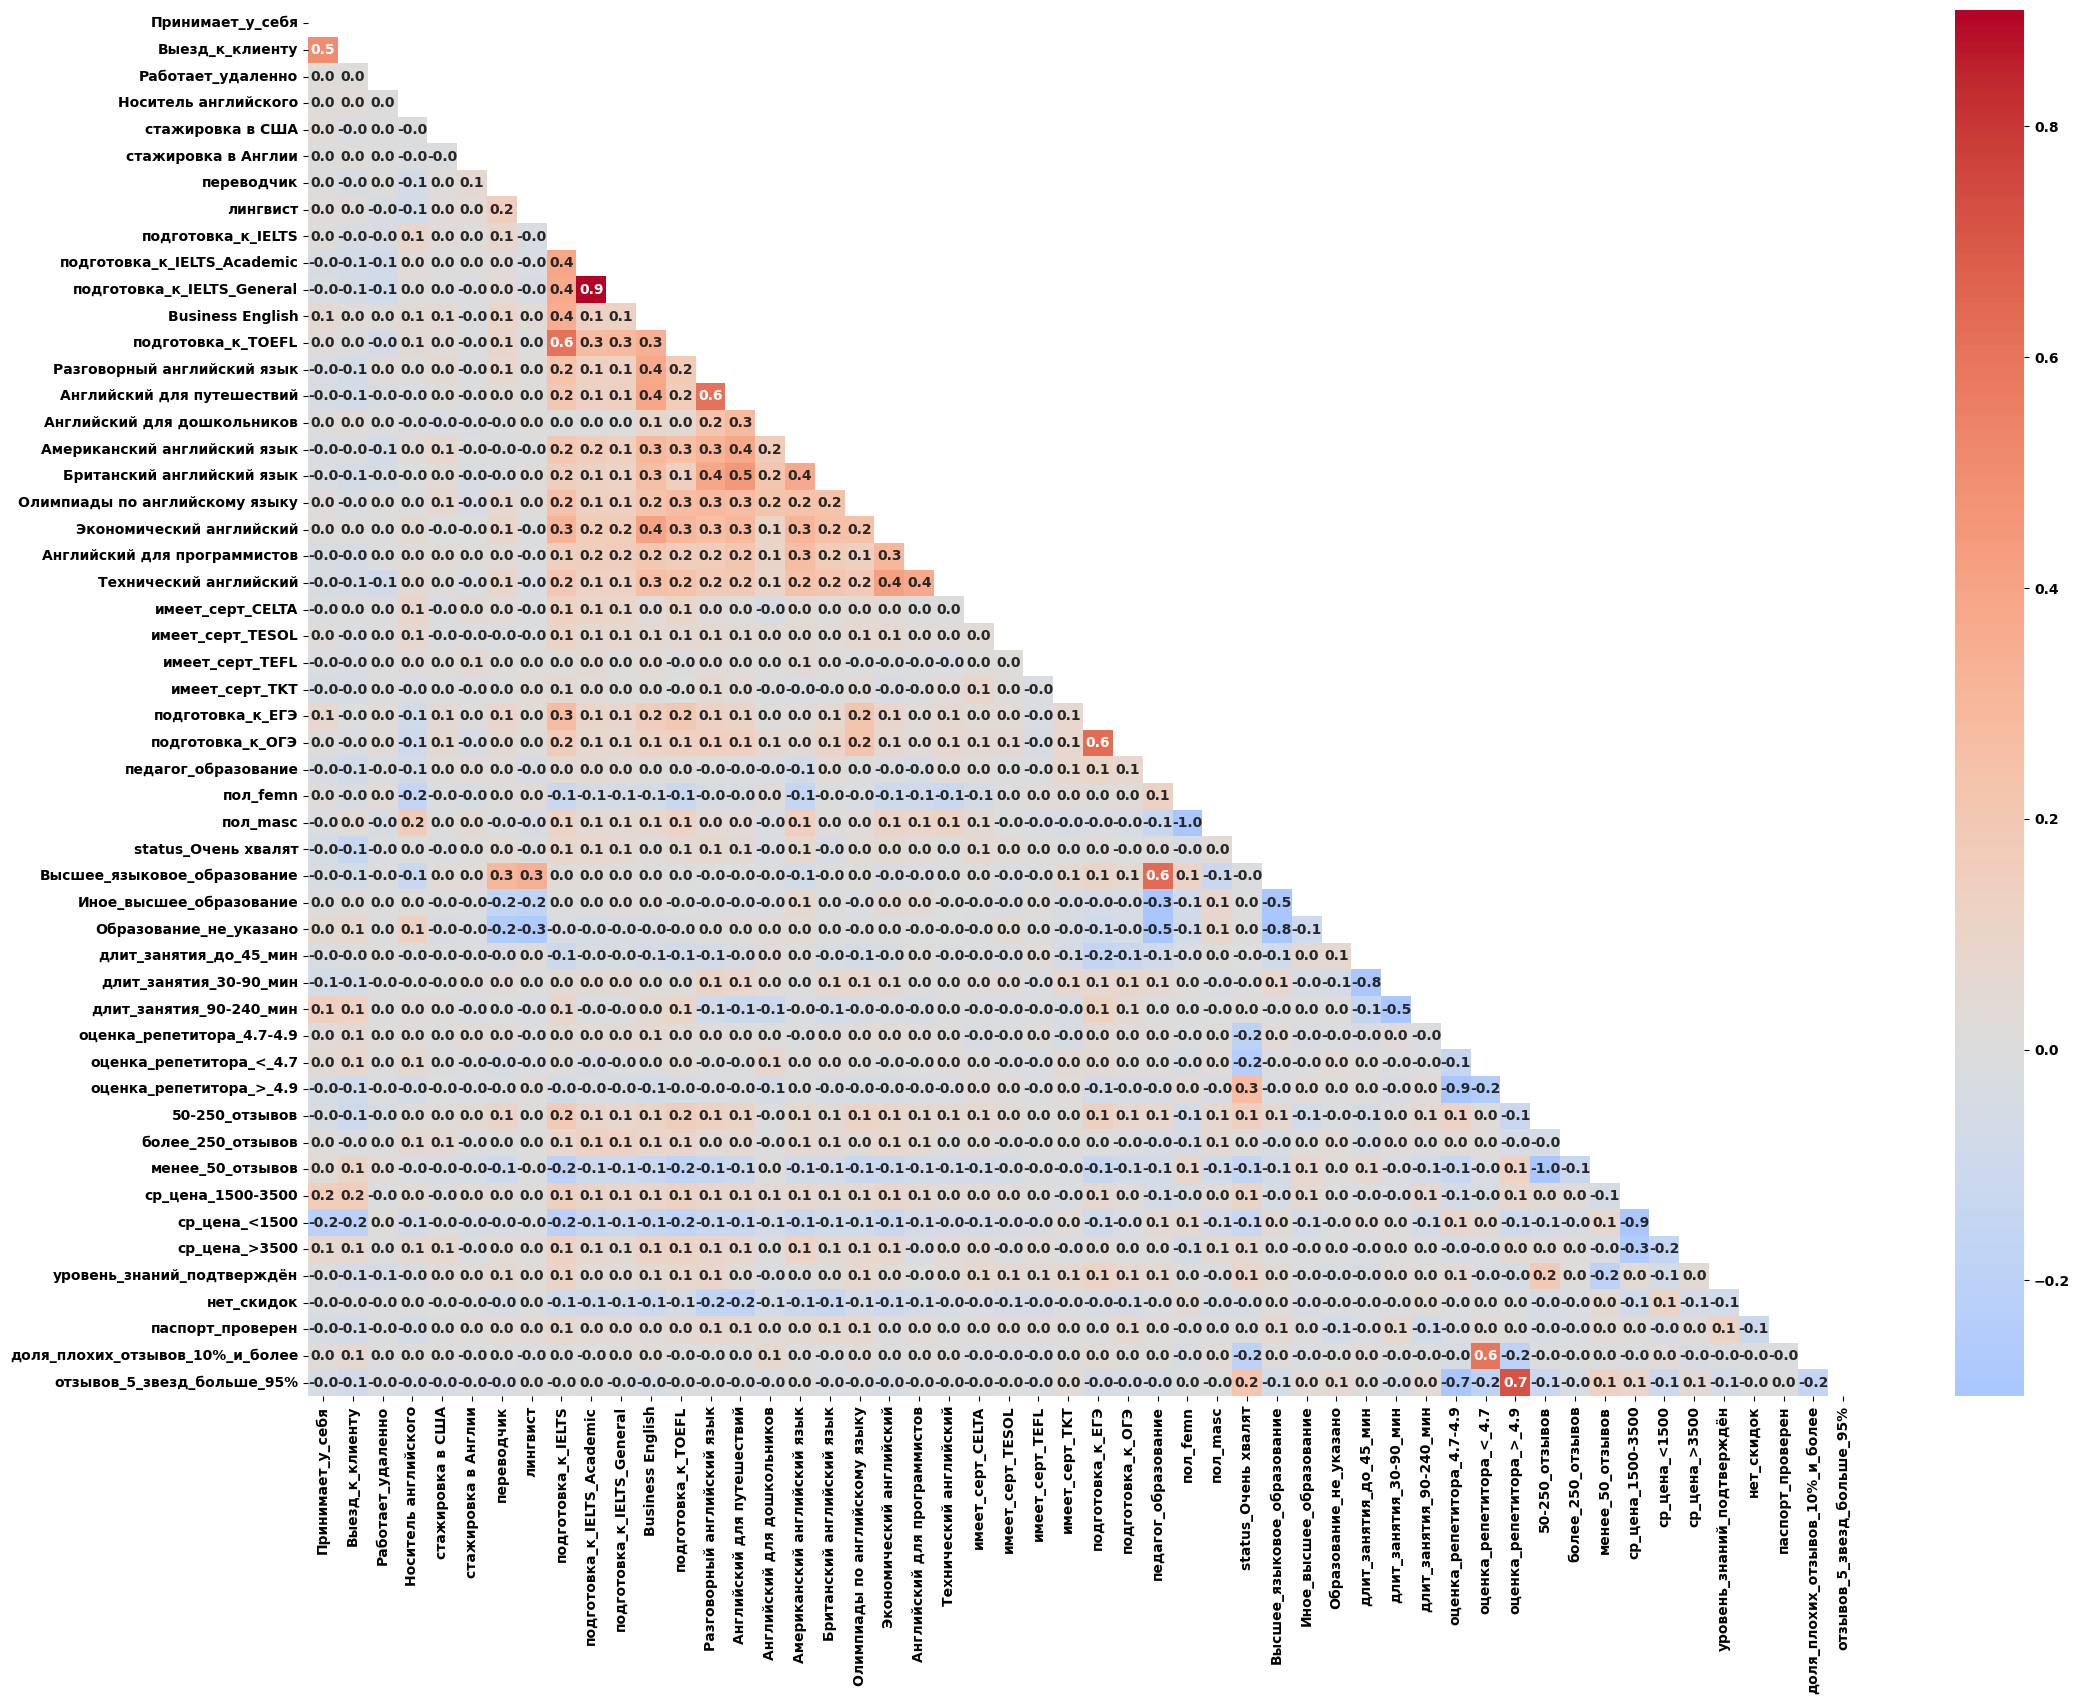

In [88]:
matrix = np.triu(df_labels.corr(method='spearman'))

plt.figure(figsize=(25, 18))

sns.heatmap(df_labels.corr(method='spearman'),
            annot=True,
            fmt='.1f',
            vmin=-0.3,
            center=0,
            cmap='coolwarm',
            mask=matrix)

In [ ]:
# сохраняем в csv
# df_labels.to_csv('../data/df_labels_EDA.csv', index=False) 